# API Cookbook

Reusable recipes that can be invoked from other notebooks.

In [1]:
%matplotlib inline

## Instaquery

In [2]:
# <api>
from IPython.display import display, Image
from IPython.html.widgets import interact_manual

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
# <api>
def instaquery(df, renderer=lambda df, by: display(df)):
    '''
    Creates an interactive query widget with an optional custom renderer.
    
    df: DataFrame to query
    renderer: Render function of the form lambda df, by where df is the subset of the DataFrame rows
        matching the query and by is the column selected for a group-by option. The default render
        function simply displays the rows matching the query and ignores the group-by.
    '''
    by_vals = tuple(['---'] + list(df.columns))

    @interact_manual(query='', by=by_vals)
    def instaquery(query, by):
        '''Inner function that gets called when the user interacts with the widgets.'''
        try:
            sub_df = df.query(query)
        except ValueError as ex:
            sub_df = df
        # replace sentinel with None
        by = None if by == '---' else by
        renderer(sub_df, by)

This `instaquery` function can be handy for quick, throwaway exploration that you do not want captured permanently in the notebook (e.g., exploration off the primary track).

Requires `numexpr`. 

See https://github.com/knowledgeanyhow/notebooks/blob/master/hacks/instaquery.ipynb for full details.

In [9]:
# <help:instaquery>
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')

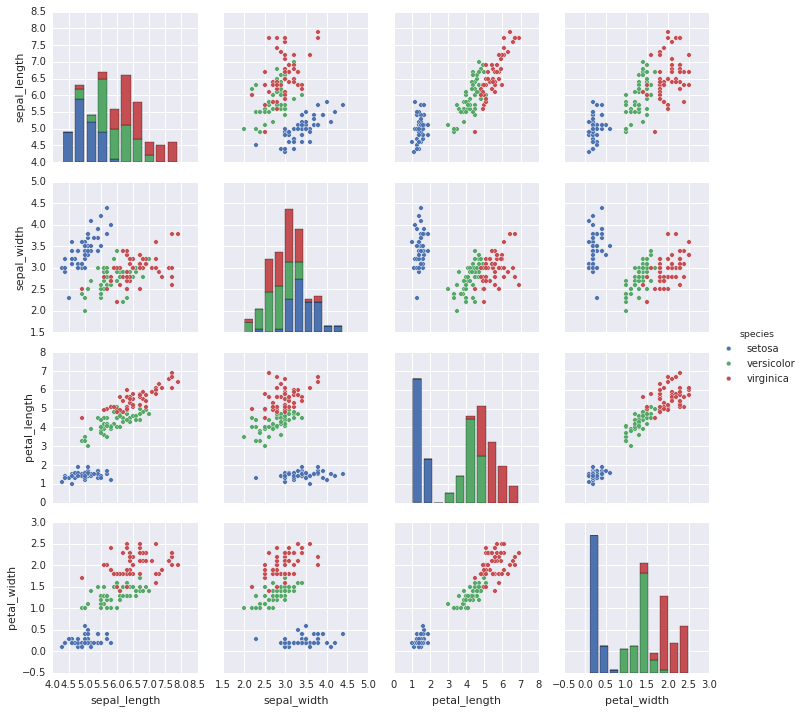

In [10]:
# <help:instaquery>
instaquery(df, lambda df, by: sns.pairplot(df, size=2.5, hue=by))

## Post as Gist

In [ ]:
# <api>
def gist_it(api_token, content=None, filename=None, username='parente', gist_id=None):
    '''Publishes string content or a file on disk as a new gist or an update to an existing one.'''
    if content is None and filename is None:
        raise RuntimeError('must specify content or filename')
    import simplegist
    gist = simplegist.Simplegist(username=username, api_token=api_token)
    if content is None:
        with open(filename) as f:
            content = f.read()
    if gist_id:
        profile = gist.profile()
        return profile.edit(id=gist_id, content=content)
    else:
        return gist.create(name=filename if filename is not None else 'untitled', public=0, content=content)